In [2]:
import numpy as np
from numpy import linalg as la
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [3]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [4]:
def viewcolumn(columnvector):
    plt.imshow(columnvector.reshape([l, l], order='F'), cmap=plt.get_cmap('gray'))

In [41]:
rgb_data = np.load("mini_data_resized/images_rgb.npy").astype("float32")
N = rgb_data.shape[0]
l = rgb_data.shape[1]
K = 150

channels = [rgb_data[:, :, :, 0], rgb_data[:, :, :, 1], rgb_data[:, :, :, 2]]

In [78]:
def getPCA (channel, K=150):
    M = np.zeros((N, K))
    mean = np.mean(channel, axis=0).astype("float32")
    Z = (channel - mean).astype("float32")
    meanf = np.reshape(mean, (l**2, 1))
    Zf = np.reshape(Z, (N, l**2)).T
    lam, V = la.eig(Zf.T@Zf)
    V, D = eigsort(V, lam)
    V = V[:, 0:K]
    U = Zf @ V
    U = normalize(U, norm='l2', axis=0)
    for i in range(0, N):
        M[i, :] = U.T @ Zf[:,i][:None]
    return [U.T, M, Zf, meanf]

In [86]:
pca_channels = [getPCA(channels[0]), getPCA(channels[1]), getPCA(channels[2])]

pca_red = np.dstack((pca_channels[0][1], pca_channels[1][1], pca_channels[2][1]))
pca_U = np.dstack((pca_channels[0][1], pca_channels[1][1], pca_channels[2][1]))

np.save("pca_man_reduced", pca_red)
np.save("pca_man_keys", pca_U)

In [87]:
U_g.shape

(150, 4096)

(229, 4096)
(229, 4096)
(229, 4096)
(64, 64, 3)


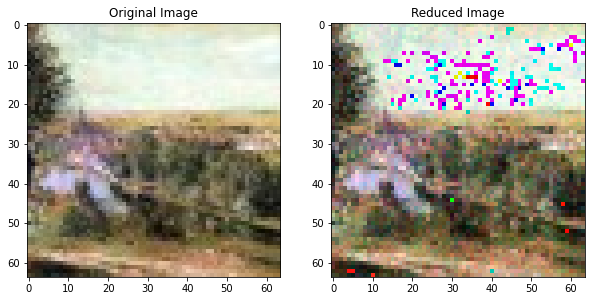

In [88]:
img_idx = 20

img_reduced = np.zeros((N, l, l, 3), dtype="uint8")
z_r = [0.0, 0.0, 0.0]

x = 0
for c in pca_channels:
    
    z_r[x] = c[1] @ c[0] + c[3].T
    z_r[x] = np.reshape(z_r[x], (N, l**2)).astype("uint8")
    print(z_r[x].shape)
    x += 1

img_original = rgb_data[img_idx].astype("uint8")
img_reduced = np.dstack((z_r[0], z_r[1], z_r[2]))
img_reduced = np.reshape(img_reduced, (N, l, l, 3))[img_idx]
print(img_reduced.shape)

fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img_original)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()